# Import Libraries

In [30]:
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

### From sklearn - Preprocesing 
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Dimension reduction 
from sklearn.decomposition import PCA

from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics 

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Index

1. Reading files and merging features with labels
2. Labels encoding
3. Normalize the dataset
4. Clustering original data with KMEANS
    4.1 Elbow method
    4.2 Evaluation of the clustering with Silhouette
5. Dimensionality reduction:  Linear Discriminant Analysis
6. Clustering reduced data: KMEANS
    6.1 Elbow method
    6.2 Evaluation of the clustering with Silhouette

-----
## 1. Reading files and merging features with labels

In [31]:
dataset = pd.read_csv("data.csv")

dataset_labels = pd.read_csv("labels.csv")

In [32]:
# Merging both datasets and removing first column
dataset = pd.merge(dataset, dataset_labels, on='Unnamed: 0').drop("Unnamed: 0", axis=1)

## 2. Labels encoding

In [33]:
# Encode the labels and updaate values
le = preprocessing.LabelEncoder()
dataset["Class"] = le.fit_transform(dataset_labels.drop("Unnamed: 0", axis=1).values.ravel())

In [34]:
# Let´s store all the labels
keys = le.classes_

# And now store labels with their encoded value 
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
dictionary

{'BRCA': 0, 'COAD': 1, 'KIRC': 2, 'LUAD': 3, 'PRAD': 4}

## 3. Normalize the dataset

In [35]:
# Lets store the dataset values without the columns titles
x = dataset.iloc[:, :-1].values 

In [36]:
# Let´s create an instance with the normalice function
min_max_scaler = preprocessing.MinMaxScaler()

# Let´s fit the normilice function
x_scaled = min_max_scaler.fit_transform(x)

# Let´s put in the dataframe the values scaled
dataset.iloc[:, :-1] = pd.DataFrame(x_scaled)

## 4. Clustering original data with KMEANS

### 4.1 Elbow method

In [37]:
X_df = dataset.drop("Class", axis=1)
X = X_df.values

<function matplotlib.pyplot.show(close=None, block=None)>

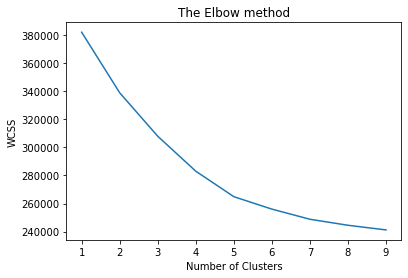

In [38]:
wcss=[]

for i in range(1,10):

    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init=10, random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show



In [39]:
# For nº cluster = nº categories

kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter = 300, n_init=10, random_state=2)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=2)

In [40]:
clusters_labels_kmean = kmeans.labels_

dataset_lalels_encoded = dataset["Class"].values

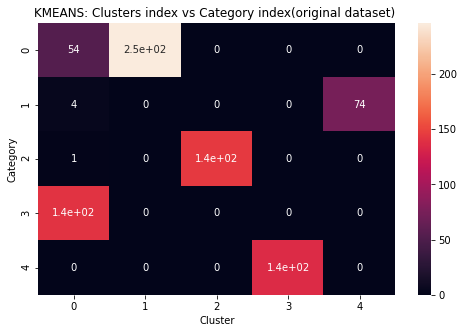

In [41]:
#Confusion matrix: informative, to see in each cluster the amount of points of each category

plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(dataset_lalels_encoded, clusters_labels_kmean, rownames=['Category'], 
                               colnames=['Cluster'])

sns.heatmap(confusion_matrix, annot=True)
#plt.savefig("Confusion_Matrix_Kmeans.png")
plt.title('KMEANS: Clusters index vs Category index(original dataset) ')
plt.show()

### 4.2 Evaluation of the clustering with Silhouette


In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 4 The average silhouette_score is : 0.1505810569473454
For n_clusters = 5 The average silhouette_score is : 0.1706820577866715
For n_clusters = 6 The average silhouette_score is : 0.1786715931682775
For n_clusters = 7 The average silhouette_score is : 0.17399542050641434


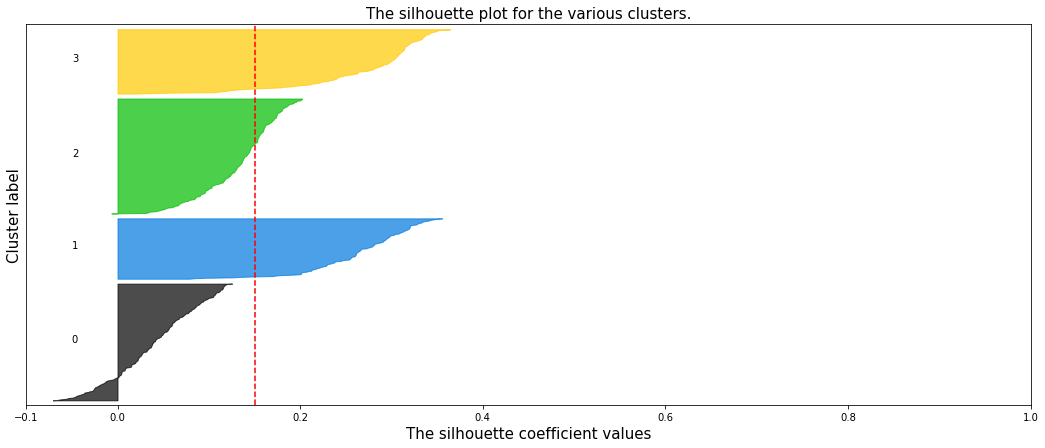

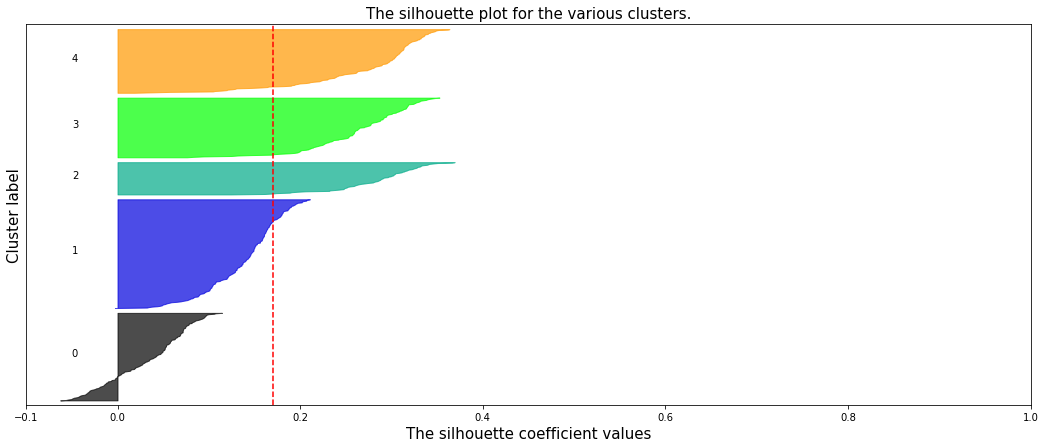

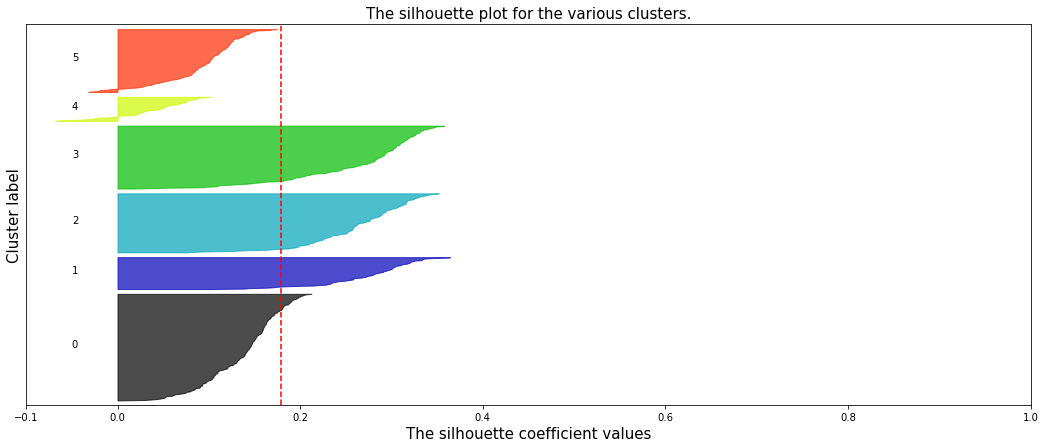

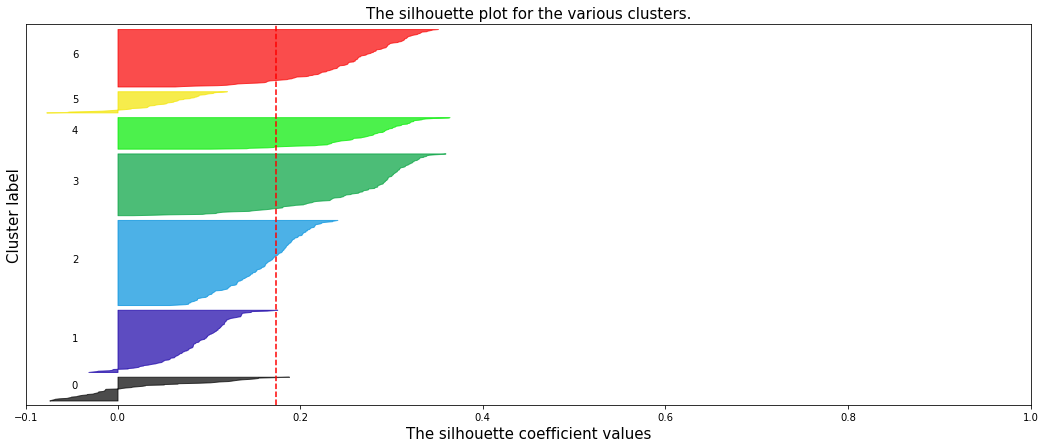

In [43]:
# Silhouete socre for different clusters 

range_n_clusters = [4, 5, 6,7]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(18, 7)
    
     # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
     # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_2 = clusterer.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels_2)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels_2)
    
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels_2 == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.", fontsize=15)
    ax1.set_xlabel("The silhouette coefficient values", fontsize=15)
    ax1.set_ylabel("Cluster label", fontsize=15)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#plt.savefig("Silhouette.png")
plt.show()

-----------
## 5. Dimensionality reduction:  Linear Discriminant Analysis


In [44]:
n_components_LDA =4

# Define transform
lda = LinearDiscriminantAnalysis(n_components=n_components_LDA)

# Apply PCA in input vector
lda.fit(dataset.iloc[:,:-1],dataset.iloc[:,-1:].values.ravel()) 

# apply transform to dataset
reduced_lda = lda.transform(dataset.iloc[:,:-1].values)
reduced_lda.shape

(801, 4)

In [45]:
# Save labels in an np.array
y_lda = dataset['Class'].to_numpy()
# apply transform to dataset
reduced_lda = lda.transform(dataset.iloc[:,:-1].values)
reduced_lda.shape

(801, 4)

In [46]:
# Create final dataframe with reduced dimensions
dataset_reduced_LDA = pd.DataFrame(np.column_stack((reduced_lda, y_lda)))
dataset_reduced_LDA.rename(columns = {n_components_LDA: 'Label'}, inplace=True)

In [47]:
dataset_reduced_LDA.head()

,0,1,2,3,Label
0,-7.958125,-10.922818,1.977301,0.584694,4.0
1,-0.301563,2.780898,-4.002351,-7.993575,3.0
2,-6.424952,-8.870978,1.488272,0.519171,4.0
3,-6.934259,-10.417199,3.695386,-0.343774,4.0
4,-2.872004,4.912284,2.841613,2.199768,0.0


------------

## 6. Clustering reduced data: KMEANS

### 6.1 Elbow method

In [48]:
X_df = dataset_reduced_LDA.drop("Label", axis=1)
X = X_df.values

<function matplotlib.pyplot.show(close=None, block=None)>

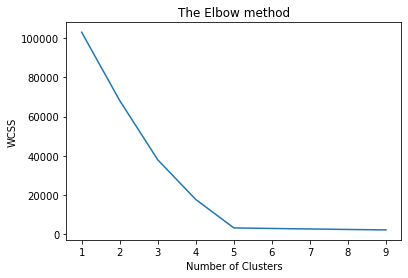

In [49]:
wcss=[]

for i in range(1,10):

    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init=10, random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show



In [50]:
# For no cluster = no categories

kmeans = KMeans(n_clusters=5, init = 'k-means++', max_iter = 300, n_init=10, random_state=2)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=2)

In [51]:
dataset_reduced_LDA

,0,1,2,3,Label
0,-7.958125,-10.922818,1.977301,0.584694,4.0
1,-0.301563,2.780898,-4.002351,-7.993575,3.0
2,-6.424952,-8.870978,1.488272,0.519171,4.0
3,-6.934259,-10.417199,3.695386,-0.343774,4.0
4,-2.872004,4.912284,2.841613,2.199768,0.0
...,...,...,...,...,...
796,-2.491183,6.516482,4.649458,1.334609,0.0
797,0.217789,1.859410,-4.089409,-7.695062,3.0
798,-1.426674,0.474514,-10.053818,4.078872,1.0
799,-7.800641,-12.104337,1.948730,0.255706,4.0


In [52]:
clusters_labels_kmean = kmeans.labels_

dataset_lalels_encoded = dataset_reduced_LDA["Label"].values

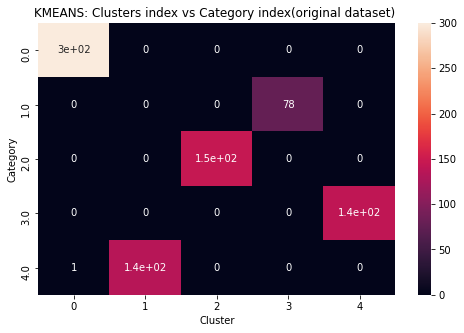

In [53]:
#Confusion matrix

plt.figure(figsize=(8,5))
confusion_matrix = pd.crosstab(dataset_lalels_encoded, clusters_labels_kmean, rownames=['Category'], 
                               colnames=['Cluster'])

sns.heatmap(confusion_matrix, annot=True)
#plt.savefig("Confusion_Matrix_Kmeans.png")
plt.title('KMEANS: Clusters index vs Category index(original dataset) ')
plt.show()

### 6.2 Evaluation of the clustering with Silhouette


In [54]:
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 5 The average silhouette_score is : 0.8340320897768939
For n_clusters = 6 The average silhouette_score is : 0.7614617970337543


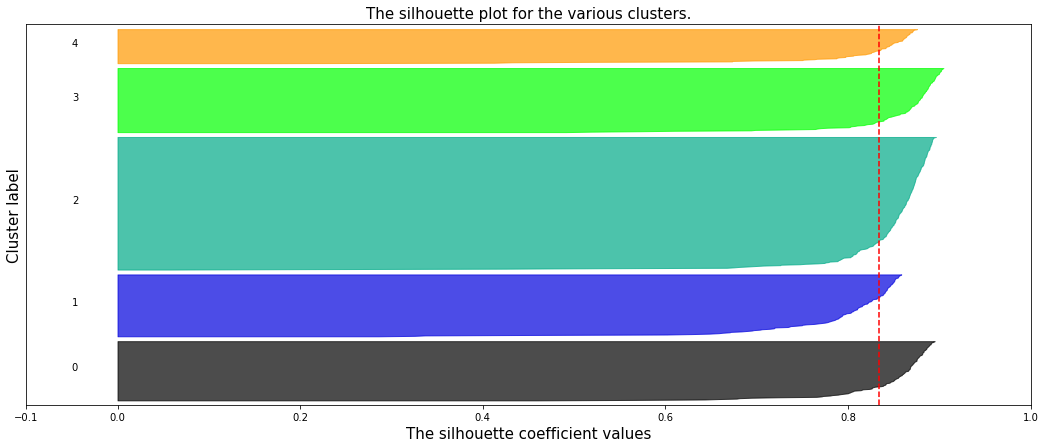

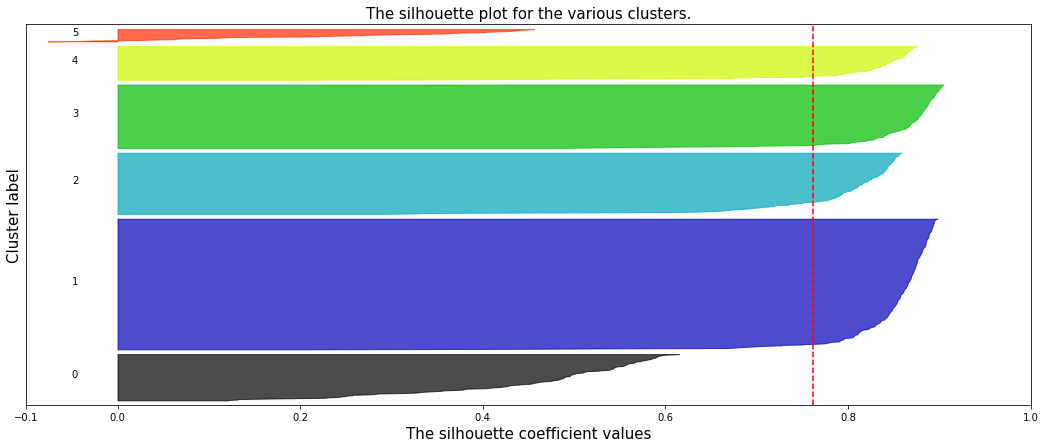

In [56]:
# Silhouete socre for different clusters 

range_n_clusters = [5, 6] #[4, 5, 6,7]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1,1)
    fig.set_size_inches(18, 7)
    
     # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
     # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels_2 = clusterer.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels_2)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels_2)
    
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels_2 == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.", fontsize=15)
    ax1.set_xlabel("The silhouette coefficient values", fontsize=15)
    ax1.set_ylabel("Cluster label", fontsize=15)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        
plt.show()